In [8]:
import pandas as pd

# Load the CSV file to examine its content
file_path = '/data/Frailty_data.csv'
data = pd.read_csv(file_path)

cleaned_file_path = '/results/Frailty_data_cleaned.csv'
data.to_csv(cleaned_file_path, index=False)

cleaned_file_path


# Display the first few rows of the dataframe to understand its structure
data.head()


,Height,Weight,Age,Grip strength,Frailty
0,65.8,112,30,30,N
1,71.5,136,19,31,N
2,69.4,153,45,29,N
3,68.2,142,22,28,Y
4,67.8,144,29,24,Y


In [9]:
data['Frailty'] = data['Frailty'].astype('category')

# To Calculate the average Grip Strength and Age for frail and not frail groups
average_metrics_by_frailty = data.groupby('Frailty').agg({
    'Grip strength': 'mean',
    'Age': 'mean'
})

average_metrics_by_frailty


,Grip strength,Age
Frailty,,
N,27.666667,33.333333
Y,23.500000,31.250000


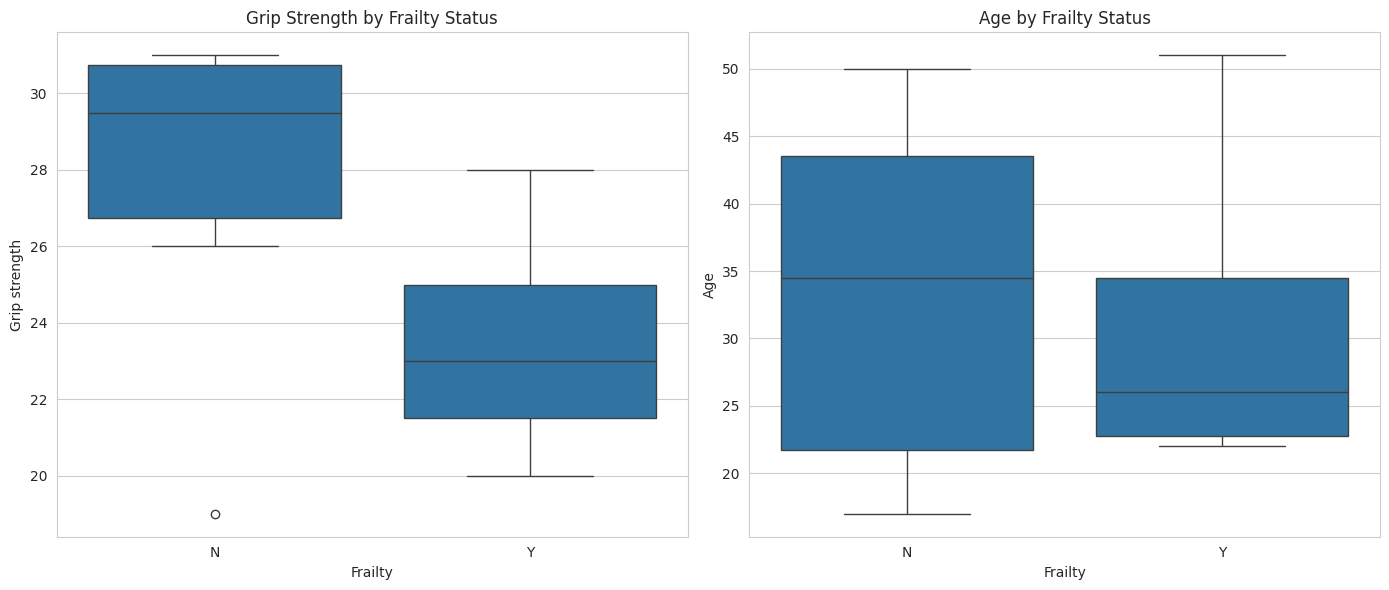

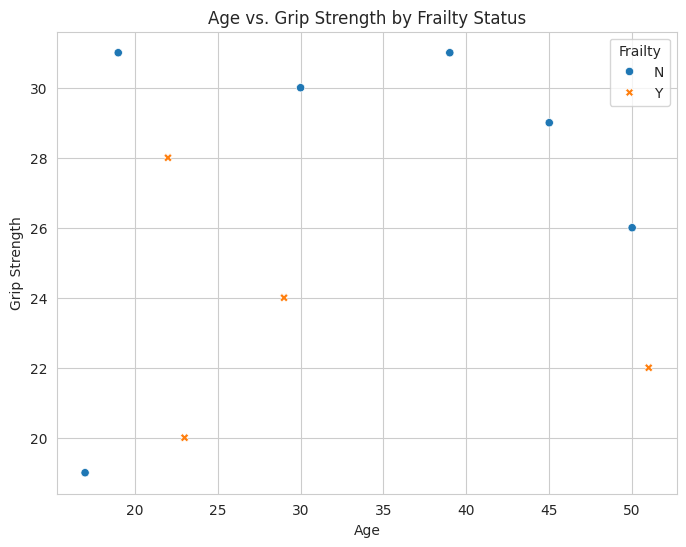

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for Grip Strength by Frailty
sns.boxplot(ax=axes[0], x='Frailty', y='Grip strength', data=data)
axes[0].set_title('Grip Strength by Frailty Status')

# Boxplot for Age by Frailty
sns.boxplot(ax=axes[1], x='Frailty', y='Age', data=data)
axes[1].set_title('Age by Frailty Status')

plt.tight_layout()
plt.show()

# Scatter plot for Age vs. Grip Strength, color-coded by Frailty
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Grip strength', hue='Frailty', style='Frailty', data=data)
plt.title('Age vs. Grip Strength by Frailty Status')
plt.xlabel('Age')
plt.ylabel('Grip Strength')
plt.legend(title='Frailty')
plt.grid(True)
plt.show()
